<a href="https://colab.research.google.com/github/Abhishekpawar16/Gz-Fashion-Recommendation-System/blob/main/Stock%20Price%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import os
from datetime import datetime
import pickle as pkl
import warnings
warnings.filterwarnings("ignore")


In [3]:
data = pd.read_csv('all_stocks_5yr.csv', delimiter=',', on_bad_lines='skip')
print(data.shape)
print(data.sample(7))


(197318, 7)
              date     open      high      low   close     volume   Name
166523  2013-09-05   76.730   77.9800   76.680   77.59   972781.0  DISCA
61403   2017-07-26   25.950   25.9500   25.570   25.59  3005375.0   ARNC
119823  2015-01-14  105.640  108.3300  105.270  107.44  1762996.0     CI
188167  2013-05-08   87.090   87.0900   86.510   86.87   634938.0    ECL
113272  2014-01-08   32.905   32.9200   32.555   32.68  1113754.0    CHD
105660  2017-03-02   93.150   93.6524   92.560   92.69  1416349.0    CCI
90371   2016-06-13  141.230  142.6500  140.940  140.94  2994572.0  BRK.B


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197318 entries, 0 to 197317
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    197318 non-null  object 
 1   open    197315 non-null  float64
 2   high    197316 non-null  float64
 3   low     197315 non-null  float64
 4   close   197317 non-null  float64
 5   volume  197317 non-null  float64
 6   Name    197317 non-null  object 
dtypes: float64(5), object(2)
memory usage: 10.5+ MB


In [5]:
data['date'] = pd.to_datetime(data['date'])
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197318 entries, 0 to 197317
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    197318 non-null  datetime64[ns]
 1   open    197315 non-null  float64       
 2   high    197316 non-null  float64       
 3   low     197315 non-null  float64       
 4   close   197317 non-null  float64       
 5   volume  197317 non-null  float64       
 6   Name    197317 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 10.5+ MB


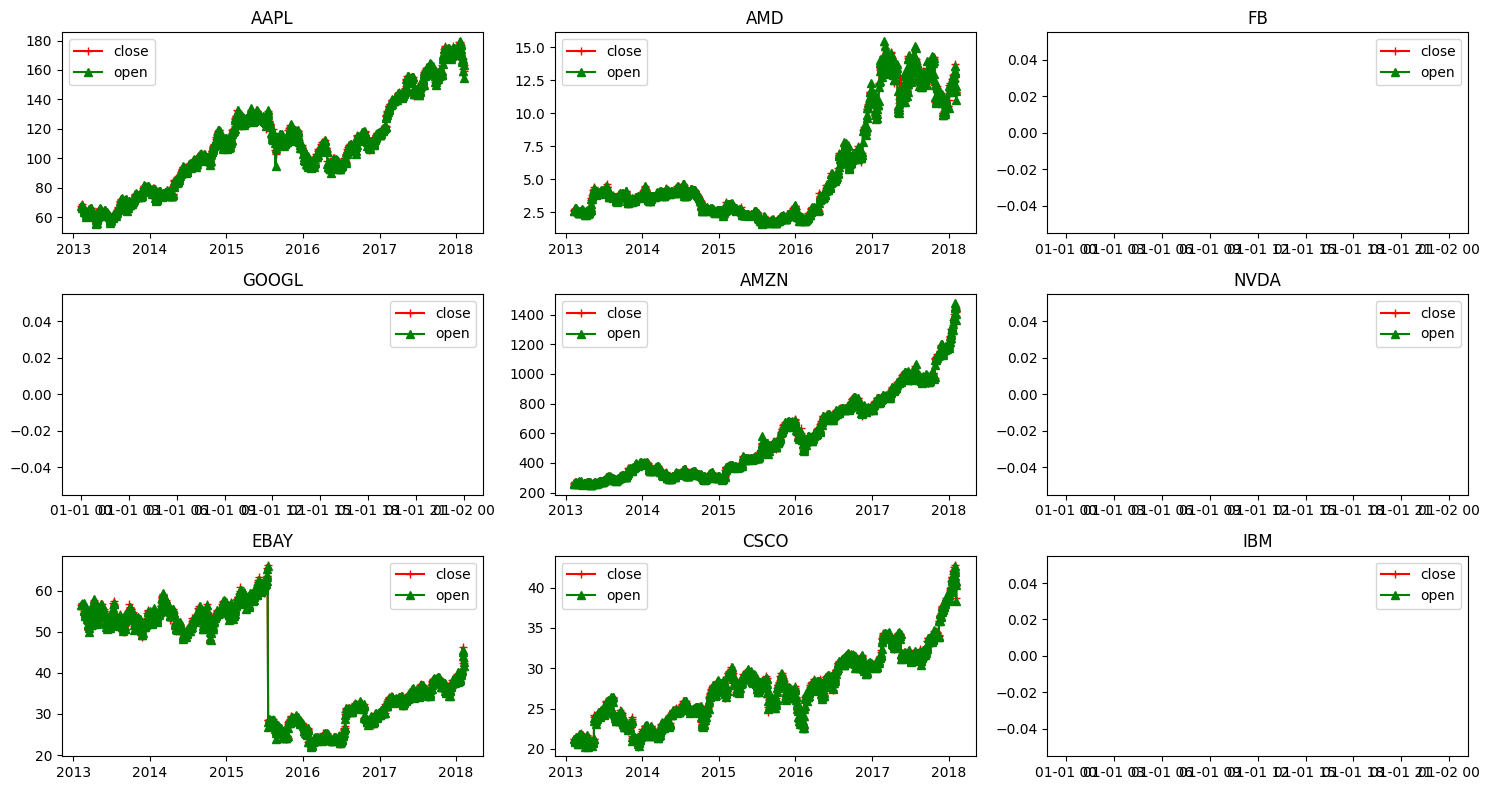

In [6]:
data['date'] = pd.to_datetime(data['date'])
# date vs open
# date vs close

# Define the list of companies you want to plot
companies = ['AAPL', 'AMD', 'FB', 'GOOGL', 'AMZN', 'NVDA', 'EBAY', 'CSCO', 'IBM']

plt.figure(figsize=(15, 8))
for index, company in enumerate(companies, 1):
    plt.subplot(3, 3, index)
    c = data[data['Name'] == company]
    plt.plot(c['date'], c['close'], c="r", label="close", marker="+")
    plt.plot(c['date'], c['open'], c="g", label="open", marker="^")
    plt.title(company)
    plt.legend()
    plt.tight_layout()

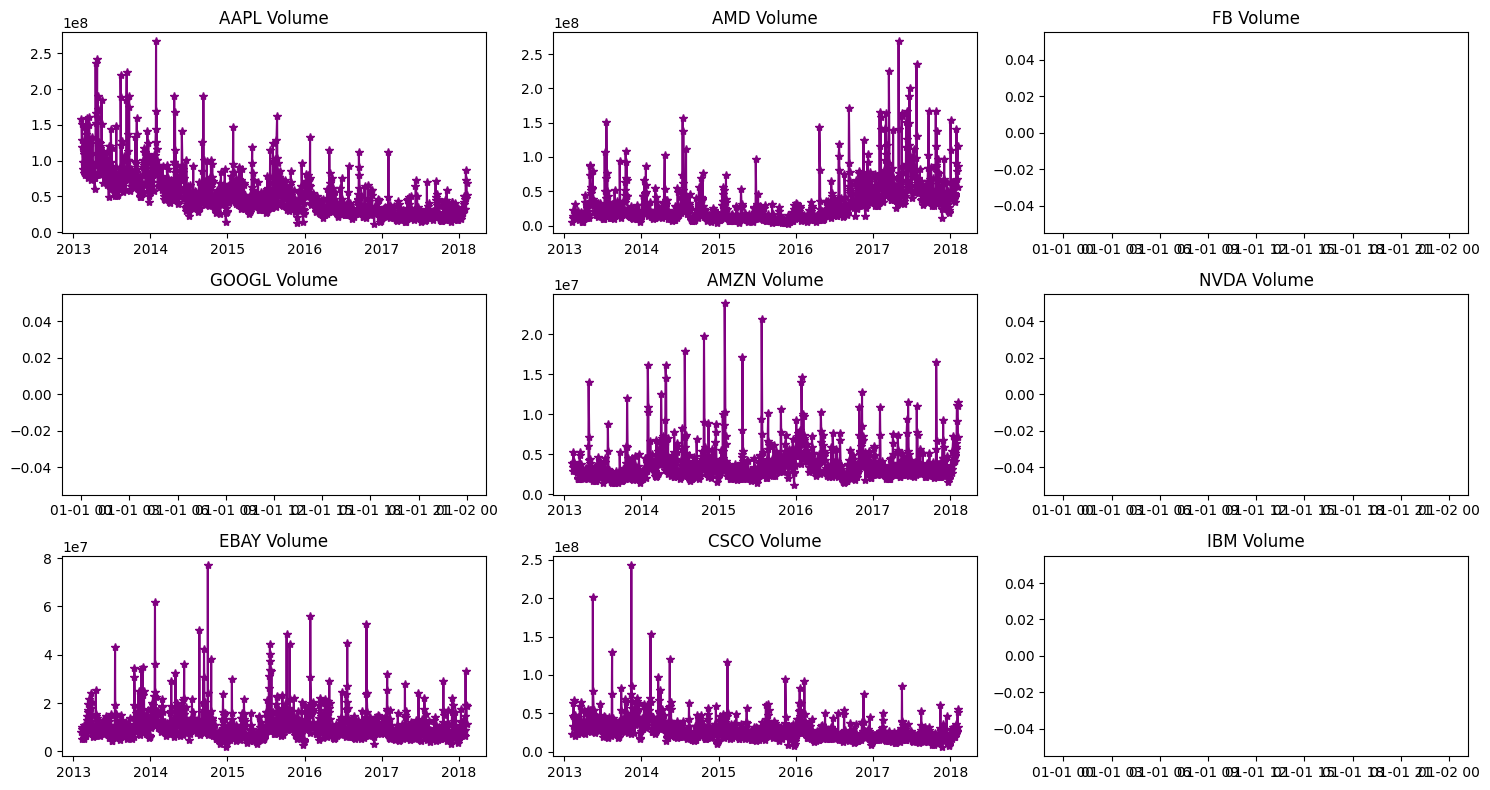

In [7]:
plt.figure(figsize=(15, 8))
for index, company in enumerate(companies, 1):
    plt.subplot(3, 3, index)
    c = data[data['Name'] == company]
    plt.plot(c['date'], c['volume'], c='purple', marker='*')
    plt.title(f"{company} Volume")
    plt.tight_layout()


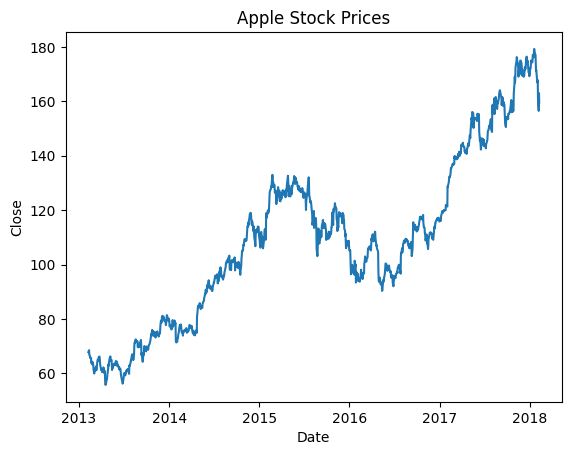

In [8]:
apple = data[data['Name'] == 'AAPL']
prediction_range = apple.loc[(apple['date'] > datetime(2013,1,1))
 & (apple['date']<datetime(2018,1,1))]
plt.plot(apple['date'],apple['close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Apple Stock Prices")
plt.show()


In [9]:
close_data = apple.filter(['close'])
dataset = close_data.values
training = int(np.ceil(len(dataset) * .95))
print(training)


1197


In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training), :]
# prepare feature and labels
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [12]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
                            return_sequences=True,
                            input_shape=(x_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 60, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,033 (203.25 KB)

 Trainable params: 52,033 (203.25 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='adam',
              loss='mean_squared_error')
history = model.fit(x_train,
                    y_train,
                    epochs=10)


Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.0719
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - loss: 0.0139
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0094
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0075
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0070
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0075
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - loss: 0.0071
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0075
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0065
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0063


In [14]:
test_data = scaled_data[training - 60:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# predict the testing data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# evaluation metrics
mse = np.mean(((predictions - y_test) ** 2))
print("MSE", mse)
print("RMSE", np.sqrt(mse))

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step
MSE 26.214598468907052
RMSE 5.1200193816925195


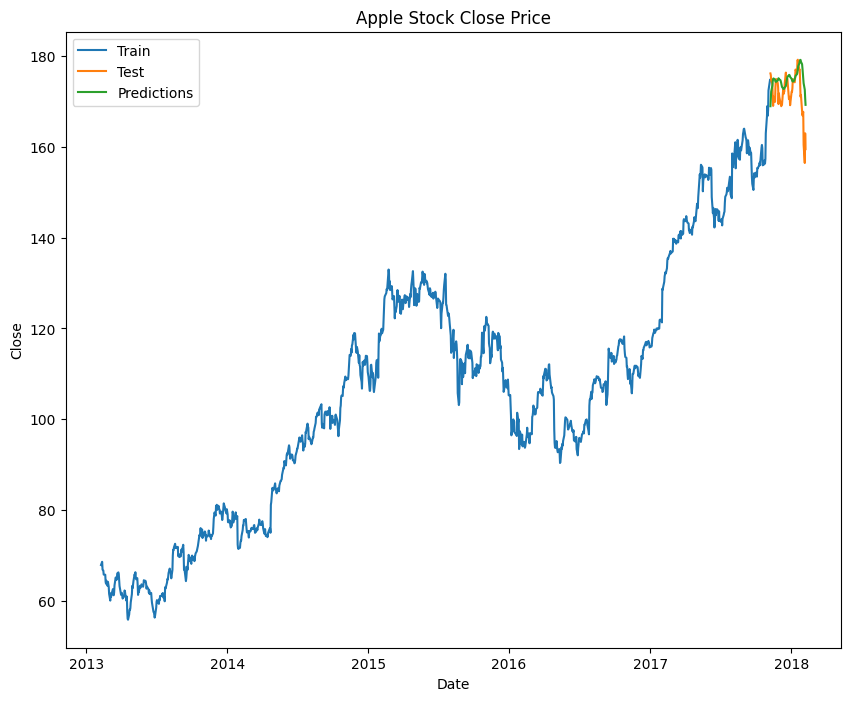

In [15]:
train = apple[:training]
test = apple[training:]
test['Predictions'] = predictions

plt.figure(figsize=(10, 8))
plt.plot(train['date'], train['close'])
plt.plot(test['date'], test[['close', 'Predictions']])
plt.title('Apple Stock Close Price')
plt.xlabel('Date')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])
